In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
url=requests.get("https://www.hepsiemlak.com/denizli-kiralik")

b'<!doctype html>\n<html data-n-head-ssr lang="tr-TR" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D">\n  <head >\n    <title>Denizli Kiral\xc4\xb1k Konut &amp; Ev Fiyatlar\xc4\xb1 | hepsiemlak</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" http-equiv="content-language" content="tr"><meta data-n-head="ssr" name="referrer" content="no-referrer-when-downgrade"><meta data-n-head="ssr" data-hid="mobile-web-app-capable" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" data-hid="apple-mobile-web-app-title" name="apple-mobile-web-app-title" content="Hepsiemlak"><meta data-n-head="ssr" data-hid="author" name="author" content="hemlak-storefront"><meta data-n-head="ssr" data-hid="theme-color" name="theme-color" content="white"><meta data-n-head="ssr" data-hid="description" name="description" content="Denizli Kiral\xc4\xb1k Konut ilanlar\xc4\xb1 ve ev fiyatla
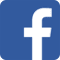
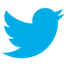
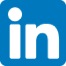
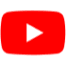

In [3]:
url.content

In [4]:
soup=BeautifulSoup(url.content,"html.parser")

<bound method Tag.prettify of <!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Denizli Kiralık Konut &amp; Ev Fiyatları | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-head="ssr" name="author"/><meta content="white" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="Denizli Kiralık Konut ilanları ve ev fiyatları hepsiemlak'ta! Sahibinden veya emlakçıdan; 1+1, 2+1, 3+
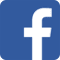
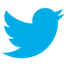
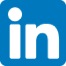
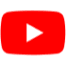

In [5]:
soup.prettify

In [6]:
html=soup.find("title")

In [7]:
html.text

'Denizli Kiralık Konut & Ev Fiyatları | hepsiemlak'

In [8]:
pages=soup.findAll("li",{"class":"he-pagination__item"})
last_page=0
for i in pages:
    last_page=i.text
last_page=int(last_page)

In [18]:
fiyatlar=[]
odalar=[]
metrekareler=[]
yaşlar=[]
katlar=[]
tarihler=[]
for i in range(1,last_page+1):
    url="https://www.hepsiemlak.com/denizli-kiralik?page="+str(i)
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")
    fiyat=soup.findAll("span",{"class":"list-view-price"})
    oda=soup.findAll("span",{"class":"celly houseRoomCount"})
    metre=soup.findAll("span",{"class":"celly squareMeter list-view-size"})
    yaş=soup.findAll("span",{"class":"celly buildingAge"})
    kat=soup.findAll("span",{"class":"celly floortype"})
    tarih=soup.findAll("span",{"class":"list-view-date"})
    fiyatlar.append(fiyat)
    odalar.append(oda)
    metrekareler.append(metre)
    yaşlar.append(yaş)
    katlar.append(kat)
    tarihler.append(tarih)

In [19]:
df=pd.DataFrame(columns=["Fiyat","Oda","Metrekare","Yaşı","Kat","Tarih"])

In [20]:
df["Fiyat"]=fiyatlar
df["Oda"]=odalar
df["Metrekare"]=metrekareler
df["Yaşı"]=yaşlar
df["Kat"]=katlar
df["Tarih"]=tarihler

In [21]:
df.head()

,Fiyat,Oda,Metrekare,Yaşı,Kat,Tarih
0,"[[\n 3.850\n , [...","[[[<span data-v-1ecf04a6="""">1 + 1</span>]], [[...","[[[<span data-v-1ecf04a6=""""><span data-v-1ecf0...","[[[3 Yaşında]], [[Sıfır Bina]], [[5 Yaşında]],...","[[\n 2. Kat], [\n ...",[[\n 23 Kasım 2022\n ]...
1,"[[\n 2.500\n , [...","[[[<span data-v-1ecf04a6="""">1 + 1</span>]], [[...","[[[<span data-v-1ecf04a6=""""><span data-v-1ecf0...","[[[5 Yaşında]], [[17 Yaşında]], [[2 Yaşında]],...","[[\n 2. Kat], [\n ...",[[\n 23 Kasım 2022\n ]...
2,"[[\n 6.000\n , [...","[[[<span data-v-1ecf04a6="""">3 + 1</span>]], [[...","[[[<span data-v-1ecf04a6=""""><span data-v-1ecf0...","[[[8 Yaşında]], [[5 Yaşında]], [[10 Yaşında]],...","[[\n 3. Kat], [\n ...",[[\n 17 Kasım 2022\n ]...
3,"[[\n 1.000\n , [...","[[[<span data-v-1ecf04a6="""">1 + 1</span>]], [[...","[[[<span data-v-1ecf04a6=""""><span data-v-1ecf0...","[[[10 Yaşında]], [[Sıfır Bina]], [[8 Yaşında]]...","[[\n Bahçe Katı], [\n ...",[[\n 17 Kasım 2022\n ]...
4,"[[\n 12.000\n , ...","[[[<span data-v-1ecf04a6="""">4 + 1</span>]], [[...","[[[<span data-v-1ecf04a6=""""><span data-v-1ecf0...","[[[20 Yaşında]], [[15 Yaşında]], [[3 Yaşında]]...","[[\n], [\n 4. Kat], [\n ...",[[\n 23 Kasım 2022\n ]...


In [22]:
df.shape

(12, 6)

In [26]:
df["Fiyat"]=df["Fiyat"].replace({'\n':'',',':'','TL':''},regex=True).astype('int64')

ValueError: setting an array element with a sequence.

In [ ]:
df.head()